## Import Dependencies

In [1]:
# Import depdendencies
import pandas as pd

## Read in the Dataset

In [2]:
# Read in the CSV
dataset = "../Data/dataset.csv"

df = pd.read_csv(dataset)

In [3]:
# Display the training dataset
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Initial Data Exploration

In [4]:
# Review what diseases are in the "Disease" column
df['Disease'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [5]:
# Review how many of each disease are in the dataset
df['Disease'].value_counts()

Disease
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Aller

## Data Pre-Processing - Feature Data

In [6]:
# Only include 10 diseases/illnesses in the dataset for machine learning
diseases = ['Allergy', 'Drug Reaction', 'Migraine', 'Common Cold', 'Pneumonia', 'Heart attack', 
            'Fungal infection', 'Hypoglycemia', 'Urinary tract infection', 'Chicken pox']
diseases_df = df.loc[df['Disease'].isin(diseases)]

In [7]:
# Review which diseases are in the new dataset
diseases_df['Disease'].value_counts()

Disease
Fungal infection           120
Allergy                    120
Drug Reaction              120
Migraine                   120
Chicken pox                120
Common Cold                120
Pneumonia                  120
Heart attack               120
Hypoglycemia               120
Urinary tract infection    120
Name: count, dtype: int64

In [8]:
# Separate the Features from the Outputs
X = diseases_df.drop(columns='Disease')
y = diseases_df['Disease']

In [9]:
# Review the features data
X.head()

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Encode the categorical variables using get_dummies
X = pd.get_dummies(X, dtype=int)

In [11]:
# Review the features data after applying get_dummies
X.head()

,Symptom_1_ acidity,Symptom_1_ bladder_discomfort,Symptom_1_ breathlessness,Symptom_1_ burning_micturition,Symptom_1_ chills,Symptom_1_ continuous_sneezing,Symptom_1_ fatigue,Symptom_1_ indigestion,Symptom_1_ shivering,Symptom_1_ skin_rash,...,Symptom_12_ sinus_pressure,Symptom_13_ congestion,Symptom_13_ runny_nose,Symptom_14_ chest_pain,Symptom_14_ congestion,Symptom_15_ chest_pain,Symptom_15_ loss_of_smell,Symptom_16_ loss_of_smell,Symptom_16_ muscle_pain,Symptom_17_ muscle_pain
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Remove the "Symptom_X_ " from the column titles by defining a function
# Found code for "str.lstrip" here: https://stackoverflow.com/questions/55679401/remove-prefix-or-suffix-substring-from-column-headers-in-pandas
def remove_prefix(df, prefix):
    df.columns=df.columns.str.lstrip(prefix)


remove_prefix(X, 'Symptom_1_ ')
remove_prefix(X, '2_ ')
remove_prefix(X, '3_ ')
remove_prefix(X, '4_ ')
remove_prefix(X, '5_ ')
remove_prefix(X, '6_ ')
remove_prefix(X, '7_ ')
remove_prefix(X, '8_ ')
remove_prefix(X, '9_ ')
remove_prefix(X, '0_ ')

In [13]:
# Review the new dataframe headers
X.head()

,acidity,bladder_discomfort,breathlessness,burning_micturition,chills,continuous_sneezing,fatigue,indigestion,shivering,skin_rash,...,sinus_pressure,congestion,runny_nose,chest_pain,congestion,chest_pain,loss_of_smell,loss_of_smell,muscle_pain,muscle_pain
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Add the columns with duplicate headers and then remove the duplicates
# Found code for this here: https://stackoverflow.com/questions/58809851/how-can-i-add-the-values-of-pandas-columns-with-the-same-name
X=X.groupby(level=0,axis=1).sum()

# Correct "alpitations" to "palpitations"
X=X.rename(columns={"alpitations": "palpitations"})
X.head()

,acidity,palpitations,anxiety,bladder_discomfort,blurred_and_distorted_vision,breathlessness,burning_micturition,chest_pain,chills,congestion,...,slurred_speech,spotting_ urination,stiff_neck,stomach_pain,sweating,swelled_lymph_nodes,throat_irritation,visual_disturbances,vomiting,watering_from_eyes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Review the columns to confirm that all the duplicates were removed
X.columns

Index(['acidity', 'palpitations', 'anxiety', 'bladder_discomfort',
       'blurred_and_distorted_vision', 'breathlessness', 'burning_micturition',
       'chest_pain', 'chills', 'congestion', 'continuous_feel_of_urine',
       'continuous_sneezing', 'cough', 'depression', 'dischromic _patches',
       'drying_and_tingling_lips', 'excessive_hunger', 'fast_heart_rate',
       'fatigue', 'foul_smell_of urine', 'headache', 'high_fever',
       'indigestion', 'irritability', 'itching', 'lethargy',
       'loss_of_appetite', 'loss_of_smell', 'malaise', 'mild_fever',
       'muscle_pain', 'nausea', 'nodal_skin_eruptions', 'palpitations',
       'phlegm', 'red_spots_over_body', 'redness_of_eyes', 'runny_nose',
       'rusty_sputum', 'shivering', 'sinus_pressure', 'skin_rash',
       'slurred_speech', 'spotting_ urination', 'stiff_neck', 'stomach_pain',
       'sweating', 'swelled_lymph_nodes', 'throat_irritation',
       'visual_disturbances', 'vomiting', 'watering_from_eyes'],
      dtype='ob

## Data Analysis through Data Visualization

In [16]:
# Concatenate the dataframes to perform some analysis on the dataset
df_concat = pd.concat([y, X], axis=1)
df_concat.head()

,Disease,acidity,palpitations,anxiety,bladder_discomfort,blurred_and_distorted_vision,breathlessness,burning_micturition,chest_pain,chills,...,slurred_speech,spotting_ urination,stiff_neck,stomach_pain,sweating,swelled_lymph_nodes,throat_irritation,visual_disturbances,vomiting,watering_from_eyes
0,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Groupby the disease and sum the columns
disease_groupby = df_concat.groupby(['Disease']).sum()
disease_groupby

,acidity,palpitations,anxiety,bladder_discomfort,blurred_and_distorted_vision,breathlessness,burning_micturition,chest_pain,chills,congestion,...,slurred_speech,spotting_ urination,stiff_neck,stomach_pain,sweating,swelled_lymph_nodes,throat_irritation,visual_disturbances,vomiting,watering_from_eyes
Disease,,,,,,,,,,,,,,,,,,,,,
Allergy,0,0,0,0,0,0,0,0,108,0,...,0,0,0,0,0,0,0,0,0,108
Chicken pox,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,114,0,0,0,0
Common Cold,0,0,0,0,0,0,0,120,114,120,...,0,0,0,0,0,114,120,0,0,0
Drug Reaction,0,0,0,0,0,0,108,0,0,0,...,0,108,0,108,0,0,0,0,0,0
Fungal infection,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Heart attack,0,0,0,0,0,108,0,114,0,0,...,0,0,0,0,108,0,0,0,108,0
Hypoglycemia,0,48,114,0,114,0,0,0,0,0,...,120,0,0,0,114,0,0,0,114,0
Migraine,114,0,0,0,114,0,0,0,0,0,...,0,0,114,0,0,0,0,114,0,0
Pneumonia,0,0,0,0,0,114,0,120,114,0,...,0,0,0,0,114,0,0,0,0,0


In [18]:
# Define a function for plotting different symptoms vs the diseases
def plot_diseases(df, y):
    df.plot.bar(y=y, use_index=True, ylabel=y)

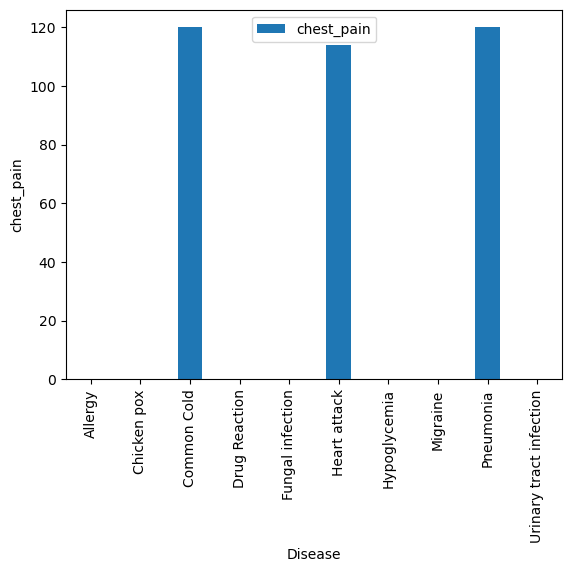

In [19]:
# Plot for chest_pain
plot_diseases(disease_groupby, 'chest_pain')

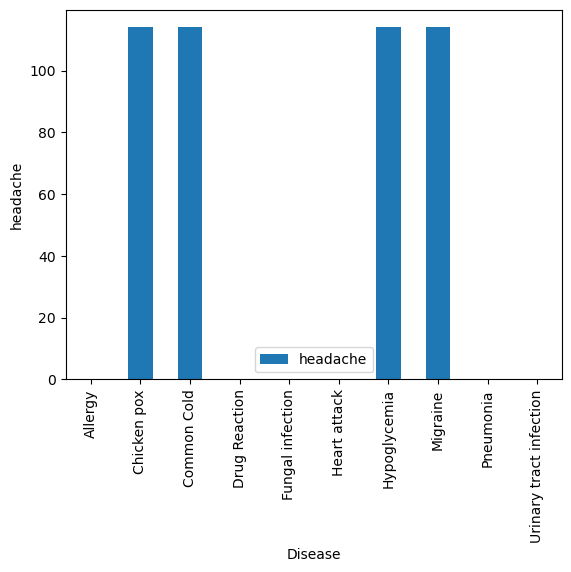

In [20]:
# Plot for headache
plot_diseases(disease_groupby, 'headache')

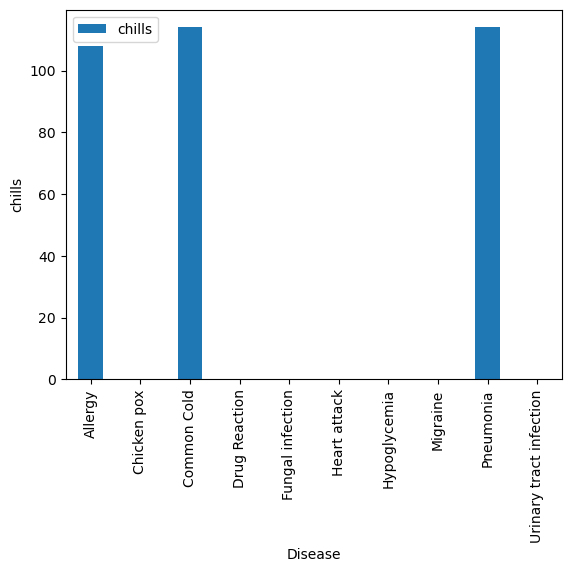

In [21]:
# Plot for chills
plot_diseases(disease_groupby, 'chills')

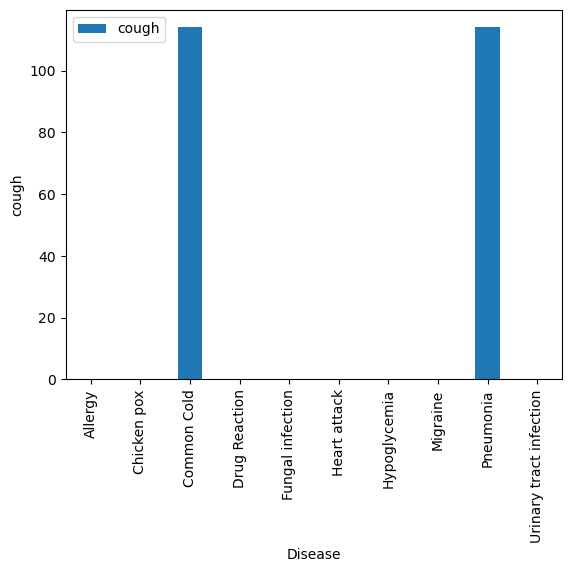

In [22]:
# Plot for cough
plot_diseases(disease_groupby, 'cough')

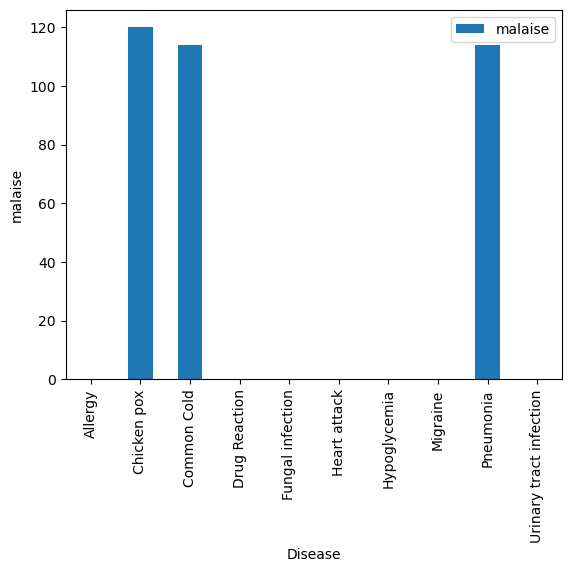

In [23]:
# Plot for malaise
plot_diseases(disease_groupby, 'malaise')

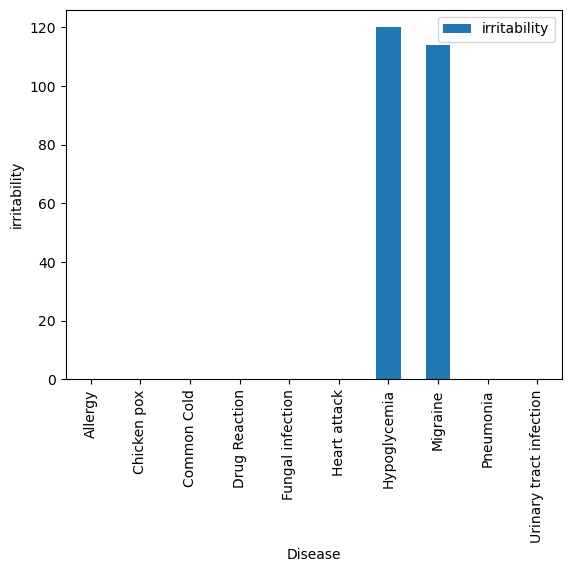

In [24]:
# Plot for irritability
plot_diseases(disease_groupby, 'irritability')

## Data Pre-Processing - Output Data

In [25]:
# Review the output data
y.head()

0    Fungal infection
1    Fungal infection
2    Fungal infection
3    Fungal infection
4    Fungal infection
Name: Disease, dtype: object

In [26]:
# Convert the 5 diseases to numerical values
nums = [0,1,2,3,4,5,6,7,8,9]
y = y.replace(diseases, nums)

In [27]:
# Confirm that the diseases were replaced with integers
y.value_counts()

Disease
6    120
0    120
1    120
2    120
9    120
3    120
4    120
5    120
7    120
8    120
Name: count, dtype: int64

In [28]:
# Concatenate the encoded features and output data
data_encoded = pd.concat([X, y], axis=1)
data_encoded = data_encoded.reset_index()

In [29]:
# Drop the "index" column
data_encoded = data_encoded.drop(columns="index")
data_encoded

,acidity,palpitations,anxiety,bladder_discomfort,blurred_and_distorted_vision,breathlessness,burning_micturition,chest_pain,chills,congestion,...,spotting_ urination,stiff_neck,stomach_pain,sweating,swelled_lymph_nodes,throat_irritation,visual_disturbances,vomiting,watering_from_eyes,Disease
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,1,1,0,0,0,3
1196,0,0,0,0,0,1,0,1,1,0,...,0,0,0,1,0,0,0,0,0,4
1197,0,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,5
1198,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,7


In [30]:
# Save the newly encoded dataset to a csv file
data_encoded.to_csv('../Data/encoded_data.csv', index=False)